In [209]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import datetime
%matplotlib inline
import pandas as pd
import scipy.stats as stats

pd.set_option('display.max_rows', 100000)

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
data_df = pd.read_csv(r"C:\Users\muthukumar\Desktop\005_SaveNWBCSHere\03_Activities&HW\07-git\us-counties\USCounties.csv")


In [3]:
#Display the dataset
data_df.head()

,date,county,state,fips,cases,deaths
0,1/21/2020,Snohomish,Washington,53061.0,1,0
1,1/22/2020,Snohomish,Washington,53061.0,1,0
2,1/23/2020,Snohomish,Washington,53061.0,1,0
3,1/24/2020,Cook,Illinois,17031.0,1,0
4,1/24/2020,Snohomish,Washington,53061.0,1,0


In [415]:
#Cases,Deaths grouped by county
data_grouped = data_df.groupby('state')
data_grouped_df = data_grouped['deaths', 'cases'].max()
data_grouped_df

,deaths,cases
state,,
Alabama,372,22300
Alaska,41,6288
Arizona,3512,149720
Arkansas,193,11110
California,6876,288451
Colorado,449,16005
Connecticut,1445,21368
Delaware,332,12153
District of Columbia,641,16370


In [416]:
data_grouped_c_df = data_grouped_df[data_grouped_df['deaths'] >= 500].sort_values(by = 'deaths', ascending = False)
data_grouped_f_df = data_grouped_c_df.reset_index()
data_grouped_f_df

,state,deaths,cases
0,New York,23935,259064
1,California,6876,288451
2,Illinois,5357,163912
3,Florida,3540,178353
4,Arizona,3512,149720
5,Michigan,3019,37977
6,Texas,2728,154367
7,Massachusetts,2223,29986
8,New Jersey,2134,23980
9,Pennsylvania,1868,40179


In [417]:
data_grouped_c_df = data_grouped_f_df[:10]
data_grouped_c_df

,state,deaths,cases
0,New York,23935,259064
1,California,6876,288451
2,Illinois,5357,163912
3,Florida,3540,178353
4,Arizona,3512,149720
5,Michigan,3019,37977
6,Texas,2728,154367
7,Massachusetts,2223,29986
8,New Jersey,2134,23980
9,Pennsylvania,1868,40179


Text(0.5, 1.0, 'US State Covid Deaths')

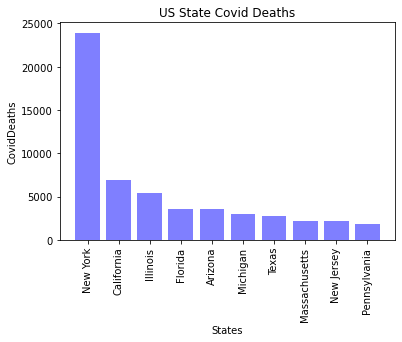

In [418]:
#Visualization of Covid deaths vs cases in the top10 affected US counties
states = data_grouped_c_df['state']
dths = data_grouped_c_df['deaths']
css = data_grouped_c_df['cases']

#Create a bar chart based upon the above data 
plt.bar(states, dths, color='b', alpha=0.5, align="center")
#plt.bar(states, css, color='r', alpha=0.5, align="left")
# Create the ticks for our bar chart's x axis 

plt.xticks(states, rotation="vertical")
plt.xlabel('States')
plt.ylabel('CovidDeaths')
plt.title('US State Covid Deaths')

In [61]:
#Importing dataset
conf_w_df = pd.read_csv(r"time_series_covid_19_confirmed_PIVOT.csv")
death_w_df = pd.read_csv(r"time_series_covid_19_deaths PIVOT new.csv")
#conf_us_df = pd.read_csv(r"time_series_covid_19_confirmed_US PIVOT.csv")
#death_us_df = pd.read_csv(r"time_series_covid_19_deaths_US PIVOT.csv")
#conf_w_df
#death_w_df
#death_us_df


In [62]:
conf_w_grouped = conf_w_df.groupby(['Month'])
conf_w_grouped_df = conf_w_grouped.sum()
conf_w_grouped_r_df = conf_w_grouped_df.reset_index()
conf_w_grouped_r_df

,Month,Confirmed Cases,Lat,Long
0,1,38536,56063.82050,60726.312140
1,2,1672031,162585.07945,176106.305206
2,3,9055277,173797.84355,188251.567634
3,4,63566010,168191.46150,182178.936420
4,5,145046091,173797.84355,188251.567634
5,6,246447294,168191.46150,182178.936420
6,7,431373538,173797.84355,188251.567634
7,8,670846153,173797.84355,188251.567634
8,9,661632622,128946.78715,139670.517922


In [63]:
death_w_grouped = death_w_df.groupby(['Month'])
death_w_grouped_df = death_w_grouped.sum()
death_w_grouped_r_df = death_w_grouped_df.reset_index()
death_w_grouped_r_df

,Month,COVID_DEATHS,Lat,Long
0,1,889,56063.82050,60726.312140
1,2,46910,162585.07945,176106.305206
2,3,398323,173797.84355,188251.567634
3,4,4347375,168191.46150,182178.936420
4,5,9657801,173797.84355,188251.567634
5,6,13294645,168191.46150,182178.936420
6,7,18284141,173797.84355,188251.567634
7,8,23801937,173797.84355,188251.567634
8,9,21117658,128946.78715,139670.517922


In [64]:
#conf_us_grouped = conf_us_df.groupby(['Month'])
#conf_us_grouped_df = conf_us_grouped.sum()
#conf_us_grouped_r_df = conf_us_grouped_df.reset_index()
#conf_us_grouped_r_df

,Month,Date,CONFIRMED US,UID,code3,FIPS,Lat,Long_
0,1,1464807100,41,2786547970180,27872020,1.100954e+09,1.226021e+06,-2.959289e+06
1,2,4249829360,402,8080989113522,80828858,3.192767e+09,3.555461e+06,-8.581939e+06
2,3,4546027240,1117657,8638298707558,86403262,3.412958e+09,3.800665e+06,-9.173797e+06
3,4,4402437300,19691985,8359643910540,83616060,3.302862e+09,3.678063e+06,-8.877868e+06
4,5,4552343180,45413492,8638298707558,86403262,3.412958e+09,3.800665e+06,-9.173797e+06
5,6,4408549500,64816883,8359643910540,83616060,3.302862e+09,3.678063e+06,-8.877868e+06
6,7,4558659120,111045108,8638298707558,86403262,3.412958e+09,3.800665e+06,-9.173797e+06
7,8,4561868860,166134262,8638298707558,86403262,3.412958e+09,3.800665e+06,-9.173797e+06
8,9,3386686520,149311209,6409060331414,64105646,2.532194e+09,2.819848e+06,-6.806365e+06


In [65]:
#death_us_grouped = death_us_df.groupby(['Month'])
#death_us_grouped_df = death_us_grouped.sum()
#death_us_grouped_r_df = death_us_grouped_df.reset_index()
#death_us_grouped_r_df

,Month,COVID Death,UID,code3,FIPS,Lat,Long_
0,1,41,2786547970180,27872020,1.100954e+09,1.226021e+06,-2.959289e+06
1,2,402,8080989113522,80828858,3.192767e+09,3.555461e+06,-8.581939e+06
2,3,1117657,8638298707558,86403262,3.412958e+09,3.800665e+06,-9.173797e+06
3,4,19691985,8359643910540,83616060,3.302862e+09,3.678063e+06,-8.877868e+06
4,5,45413492,8638298707558,86403262,3.412958e+09,3.800665e+06,-9.173797e+06
5,6,64816883,8359643910540,83616060,3.302862e+09,3.678063e+06,-8.877868e+06
6,7,111045108,8638298707558,86403262,3.412958e+09,3.800665e+06,-9.173797e+06
7,8,166134262,8638298707558,86403262,3.412958e+09,3.800665e+06,-9.173797e+06
8,9,149311209,6409060331414,64105646,2.532194e+09,2.819848e+06,-6.806365e+06


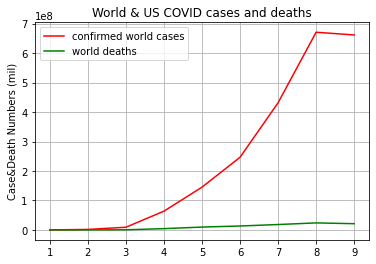

In [452]:
M1 = conf_w_grouped_r_df['Month']
M2 = death_w_grouped_r_df['Month']

#M3 = conf_us_grouped_r_df['Month']
#M4 = death_us_grouped_r_df['Month']
a = conf_w_grouped_r_df['Confirmed Cases']
b = death_w_grouped_r_df['COVID_DEATHS']
#e = conf_us_grouped_r_df['CONFIRMED US']
#d = death_us_grouped_r_df['COVID Death']
plt.plot(M1, a, color="red", label="confirmed world cases" )
plt.plot(M2, b, color="green", label="world deaths" )
#plt.plot(M3, e, color="blue", label="confirmed US cases" )
#plt.plot(M4, d, color="pink", label="US deaths" )

plt.ylabel('Case&Death Numbers (mil)')
plt.title('World & US COVID cases and deaths')
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
'''
Are existing respiratory conditions significant contributor to COVID mortality ? 

We take help of various analyses available on web to answer the underlying questions on symptoms reported for COVID-19 are fever, cough, difficult in breathing which provokes the question above.
Analysis using the 'Cause of death' data in the US population of 11000 samples between the Feb 1 2020 to Oct 25 2020

Note: In this ANOVA, 'conditions' is the independent variable. We  consider 7 conditions including COVID.
Our sample sizes are the app. same, i.e. the number of observations with each of the conditions are the app. same.

General ANOVA Hypotheses:

Null hypotheses: Groups means are equal (no variation in means of groups)
RespiratoryConditions == RespiratoryCondition 
Existing respiratory conditions equally affect survival of patient upon getting affected with COVID

Alternative hypotheses: At least, one group mean is different from other groups
RespiratoryCondition =/= RespiratoryCondition 
Atleast one Existing respiratory condition might affect the patient fatally

NoRespiratoryConditions ==/== RespiratoryCondition 
Absence of existing respiratory conditions increases the possibility of surivival of patient deaths upon getting affected with COVID 
One-way (one factor) ANOVA with Python

'''

In [213]:
#Importing dataset
conditions_df = pd.read_csv(r"Conditions_contributing_to_deaths_involving_coronavirus_disease_2019__COVID-19___by_age_group_and_state__United_States.csv")

In [236]:
conditions_r_df = conditions_df[['Condition Group', 'Condition', 'Age Group', 'Number of COVID-19 Deaths']]
subset_conditions_r_df = conditions_r_df[conditions_r_df['Condition Group'].isin(['Respiratory diseases', 'COVID-19']) ]
                                   
subset_conditions_r_df.head()


,Condition Group,Condition,Age Group,Number of COVID-19 Deaths
0,Respiratory diseases,Influenza and pneumonia,0-24,156.0
1,Respiratory diseases,Influenza and pneumonia,25-34,752.0
2,Respiratory diseases,Influenza and pneumonia,35-44,1915.0
3,Respiratory diseases,Influenza and pneumonia,45-54,5391.0
4,Respiratory diseases,Influenza and pneumonia,55-64,12955.0


In [420]:
subset_conditions_r_df['Number of COVID-19 Deaths'] = subset_conditions_r_df['Number of COVID-19 Deaths'].fillna(0).astype(np.int64)
subset_conditions_r = subset_conditions_r_df.groupby(['Age Group','Condition'])
subset_conditions_summed = subset_conditions_r.max()
subset_conditions_summed_r = subset_conditions_summed.reset_index()
subset_conditions_summed_filtered = subset_conditions_summed_r[subset_conditions_summed_r['Condition'].isin(['Influenza and pneumonia', 'Respiratory failure']) ]
subset_conditions_summed_filtered

subset_conditions_infpnem = subset_conditions_summed_r[subset_conditions_summed_r['Condition'].isin(['Influenza and pneumonia'])]
#subset_conditions_infpnem
subset_infpnem1 = subset_conditions_infpnem[subset_conditions_infpnem['Age Group'] != 'All Ages']
subset_infpnem2 = subset_infpnem1[subset_infpnem1['Age Group'] != 'Not stated']
#subset_infpnem2
subset_conditions_resp = subset_conditions_summed_r[subset_conditions_summed_r['Condition'].isin(['Respiratory failure'])]
subset_conditions_resp
subset_resp1 = subset_conditions_resp[subset_conditions_resp['Age Group'] != 'All Ages']
subset_resp2 = subset_resp1[subset_resp1['Age Group'] != 'Not stated']
subset_resp2

,Age Group,Condition,Condition Group,Number of COVID-19 Deaths
6,0-24,Respiratory failure,Respiratory diseases,138
13,25-34,Respiratory failure,Respiratory diseases,537
20,35-44,Respiratory failure,Respiratory diseases,1377
27,45-54,Respiratory failure,Respiratory diseases,4117
34,55-64,Respiratory failure,Respiratory diseases,9946
41,65-74,Respiratory failure,Respiratory diseases,17394
48,75-84,Respiratory failure,Respiratory diseases,20434
55,85+,Respiratory failure,Respiratory diseases,19758


In [455]:
#Convert float type data into integer
subset_conditions_r_df['Number of COVID-19 Deaths'] = subset_conditions_r_df['Number of COVID-19 Deaths'].fillna(0).astype(np.int64)
subset1 = subset_conditions_r_df[subset_conditions_r_df['Age Group'] != 'All Ages']
subset_conditions_f_df = subset1[subset1['Age Group'] != 'Not stated']

#print (conditions_r_df['Number of COVID-19 Deaths'])
#subset_conditions_f_df = subset_conditions_r_df.drop(['Age Group'], axis = 1)
#subset_conditions_f_df

In [429]:
#Drop rows with NaN values
#subset_conditions_f_df = subset_conditions_r_df.dropna(how='all')
subset_conditions_f_df
len(subset_conditions_f_df)

3730

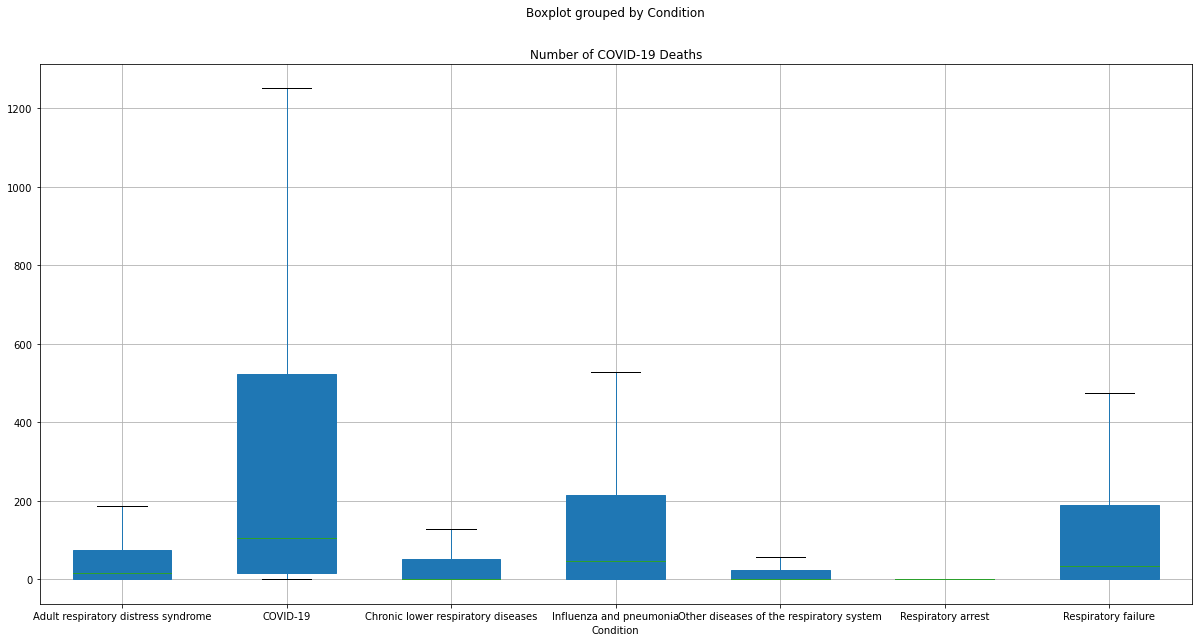

In [431]:

# Create a boxplot to compare means
subset_conditions_f_df.boxplot("Number of COVID-19 Deaths", by="Condition", widths=0.6, showfliers=False, patch_artist = True, figsize=(20, 10))

In [248]:
'''
Cause of death in the US population observed in samples between the Feb 1 2020 to Oct 25 2020
Where sample sizes are app same between the 7 condition groups. 
Further analysis might be able to prove if some COVID deaths are misleadingly categorized as Influenza and Pneumonia or respiratory failures

Are existing respiratory conditions significant contributor to COVID mortality ? 


Analysis using the 'Cause of death' data in the US population of 11000 samples between the Feb 1 2020 to Oct 25 2020

Note: In this ANOVA, 'conditions' is the independent variable. We  consider 7 conditions including COVID.
Our sample sizes are the app. same, i.e. the number of observations with each of the conditions are the app. same.

General ANOVA Hypotheses:

Null hypotheses: Groups means are equal (no variation in means of groups)
RespiratoryConditions == RespiratoryCondition 
Existing respiratory conditions equally affect survival of patient upon getting affected with COVID

(After the analysis, we conclude that the results are statistically significant.)

Alternative hypotheses: At least, one group mean is different from other groups
RespiratoryCondition =/= RespiratoryCondition 
Atleast one Existing respiratory condition might affect the patient fatally

NoRespiratoryConditions ==/== RespiratoryCondition 
Absence of existing respiratory conditions increases the possibility of surivival of patient deaths upon getting affected with COVID 
One-way (one factor) ANOVA with Python
'''


'\nCause of death in the US population observed in 12300 rows of data between the Feb 1 2020 to Oct 25 2020\n\nDo existing respiratory conditions increase the possibility of COVID death?'

In [432]:
#Extract individual groups
group1 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "Adult respiratory distress syndrome"]["Number of COVID-19 Deaths"]
group2 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "COVID-19"]["Number of COVID-19 Deaths"]
group3 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "Chronic lower respiratory diseases"]["Number of COVID-19 Deaths"]
group4 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "Influenza and pneumonia"]["Number of COVID-19 Deaths"]
group5 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "Other diseases of the respiratory system"]["Number of COVID-19 Deaths"]
group6 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "Respiratory arrest"]["Number of COVID-19 Deaths"]
group7 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "Respiratory failure"]["Number of COVID-19 Deaths"]

In [440]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)
# Null hypothesis is rejected. Therefore Atleast one Existing respiratory condition might affect the patient fatally

F_onewayResult(statistic=10.800911913621759, pvalue=6.4228242186118545e-12)

In [434]:
# the means of conditions Adult resp distress synd.,  Influenza and Pneumonia, Respiratory failure 
stats.f_oneway(group1, group4, group7)

F_onewayResult(statistic=4.063716050201931, pvalue=0.017405002152258358)

In [435]:
#Finding distribution of data between different observations
datadistribution = subset_conditions_f_df['Condition'].value_counts()
datadistribution


Adult respiratory distress syndrome         432
COVID-19                                    432
Influenza and pneumonia                     432
Chronic lower respiratory diseases          432
Respiratory failure                         432
Other diseases of the respiratory system    432
Respiratory arrest                          392
Name: Condition, dtype: int64

In [441]:
#Deaths due to the observed 3 categorical values for the chi2 test of independance. 
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_data_df = subset_conditions_f_df.groupby(['Condition'])
grouped_data_df["Number of COVID-19 Deaths"].max()



Condition
Adult respiratory distress syndrome          7236
COVID-19                                    64614
Chronic lower respiratory diseases           5862
Influenza and pneumonia                     24471
Other diseases of the respiratory system     2278
Respiratory arrest                           1462
Respiratory failure                         20434
Name: Number of COVID-19 Deaths, dtype: int64

In [437]:
observed = pd.Series([64614, 24471, 20434], index=["Adult respiratory distress syndrome", "Influenza and pneumonia", "Respiratory failure"])

In [438]:
# Create a data frame
conditions_a_df = pd.DataFrame([observed]).T
conditions_a_df

,0
Adult respiratory distress syndrome,64614
Influenza and pneumonia,24471
Respiratory failure,20434


In [442]:
# Add a column whose default values are the expected values
conditions_a_df[1] = 25000

In [443]:
# Rename columns
conditions_a_df.columns = ["observed", "expected"]

In [444]:
conditions_a_df

,observed,expected
Adult respiratory distress syndrome,64614,25000
Influenza and pneumonia,24471,25000
Respiratory failure,20434,25000


In [445]:
# The degree of freedom is 3-1 = 1
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
critical_value

3.841458820694124

In [446]:
# Run the chi square test with stats.chisquare()
stats.chisquare(conditions_a_df['observed'], conditions_a_df['expected'])

Power_divergenceResult(statistic=63615.88772, pvalue=0.0)

In [ ]:
'''
Since the chi square value of 32829.36 exceeds the critical value of 3.84, we conclude that the results are statistically significant.
'''

In [447]:
# Performing two way ANOVA 
stats.ttest_ind(group4, group7)

#Null hypothesis: both groups affect the covid death equally
#Alternate hypothesis: both groups do not affect covid death equally

Ttest_indResult(statistic=0.6292401429450935, pvalue=0.5293585728088344)

In [453]:
# Generate  data to test with
def gendata(loc1=0, loc2=0):
    population1 = subset_infpnem2["Number of COVID-19 Deaths"]
    population2 = subset_resp2["Number of COVID-19 Deaths"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

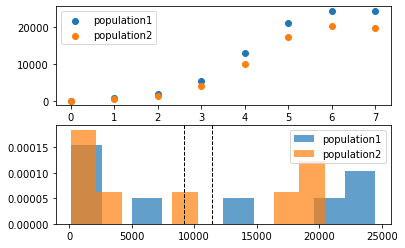

In [454]:
# Generate some data and show the scatter plot
population1, population2 = gendata()

In [414]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=0.44471963477284415, pvalue=0.6635558880298487)

In [ ]:
#There is bigger difference in means between the populations
#The important thing is that when testing samples where you know the null hypothesis is true, the P value should be uniformly distributed. If that is not the case, something is wrong. 
how do we know P value is uniform distribution